**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 6.6 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
directory = "drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Time Series/DATASET/"
df = pd.read_csv(directory + 'AirPassengers.csv', parse_dates=True, 
                 index_col='Month', date_parser=dateparse)
df.head()

<ipython-input-4-34e7673f89ab>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.values.T

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
        359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
        362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
        432]])

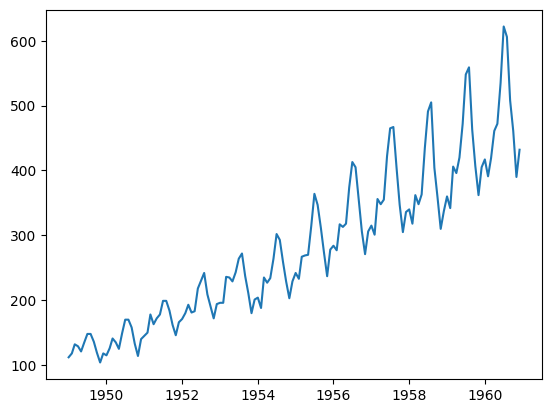

In [6]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

### Generate Random Time Series

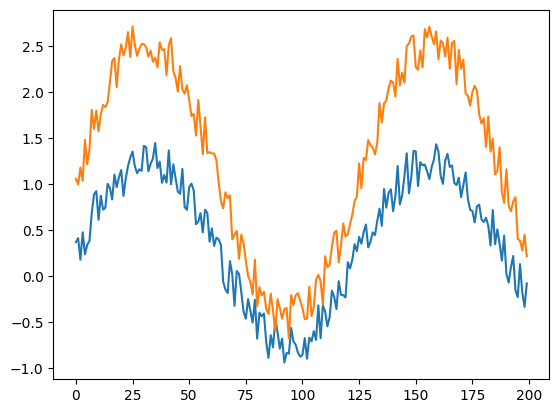

In [7]:
ts1 = pd.Series([np.sin(float(x)/20.)+np.random.rand()/2. for x in range(200)])
ts2 = pd.Series([1.5*np.sin(float(x)/20.)+np.random.rand()/2.+0.8 for x in range(200)])
plt.plot(ts1)
plt.plot(ts2)
plt.show()

In [9]:
ts1

0      0.370736
1      0.413786
2      0.179618
3      0.477277
4      0.237518
         ...   
195   -0.227369
196    0.131784
197   -0.174261
198   -0.333960
199   -0.078596
Length: 200, dtype: float64

# Transformations

### Transformation I: Offset Translation

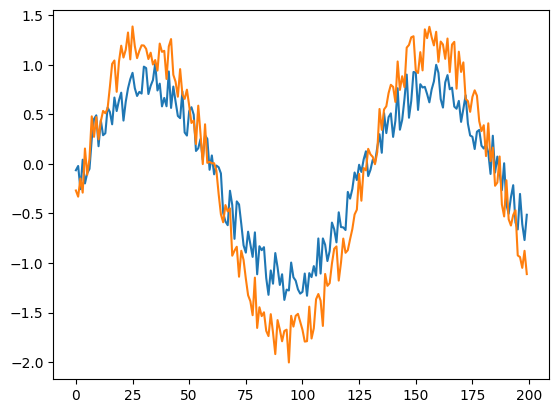

In [8]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

### Transformation II: Amplitude Scaling

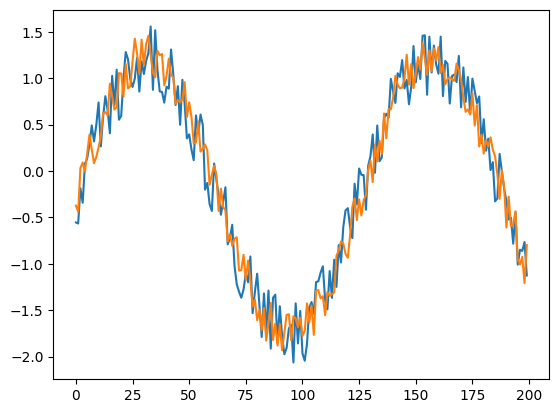

In [ ]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

https://tslearn.readthedocs.io/en/latest/index.html

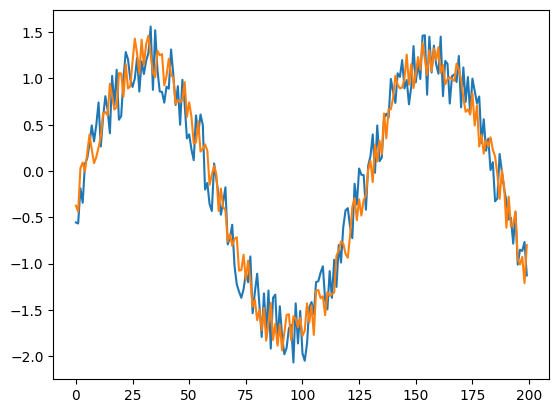

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Transformation IV: Noise (smoothing)

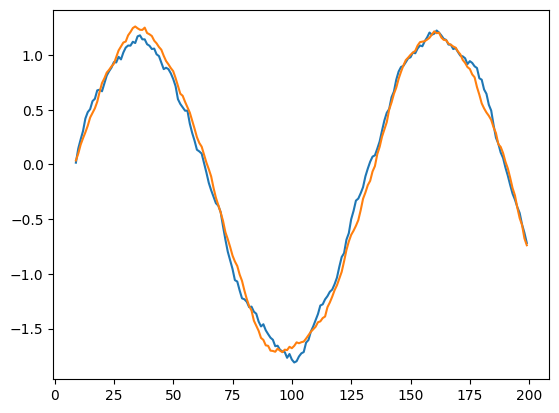

In [ ]:
w = 10
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.show()

### Transformation III: Trend removal

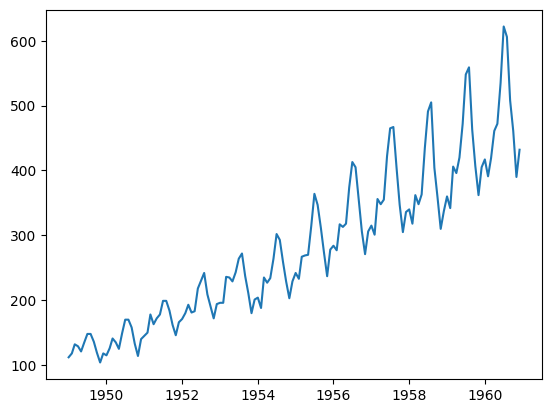

In [ ]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

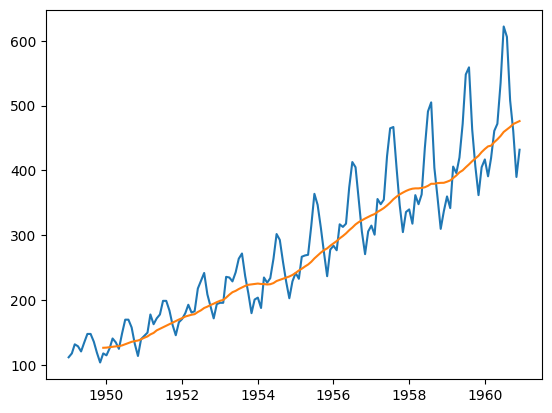

In [ ]:
plt.plot(ts)
plt.plot(ts.rolling(window=12).mean())
plt.show()

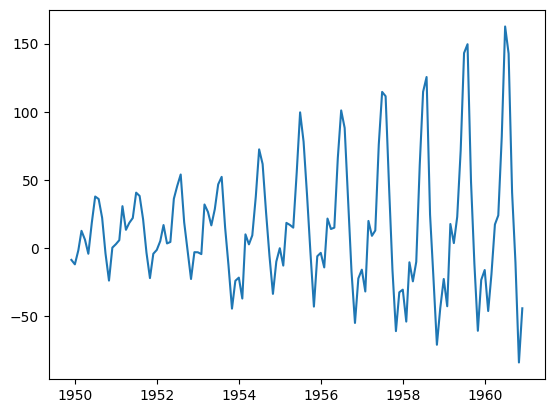

In [ ]:
ts_shift = ts - ts.rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

In [ ]:
#ts_shift2 = ts - ts.ewm(halflife=12).mean()
#plt.plot(ts_shift, 'r-')
#plt.plot(ts_shift2, 'b-')
#plt.show()

# Euclidean Distance

In [ ]:
from scipy.spatial.distance import euclidean

In [ ]:
dist = euclidean(ts1, ts2)
dist

13.447923435783153

In [ ]:
dist = euclidean(ts1[:10], ts2[:10])
dist

2.875322510599076

# Manhattan Distance

In [ ]:
from scipy.spatial.distance import cityblock

In [ ]:
dist = cityblock(ts1, ts2)
dist

174.1781579067641

In [ ]:
dist = cityblock(ts1[:10], ts2[:10])
dist

8.961049312476256

# Dynamic Time Warping

In [ ]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [ ]:
dist = dtw(ts1, ts2)
dist

8.174516231256767

In [ ]:
dist = dtw(ts1[:10], ts2[:10])
dist

2.534743944938014

In [ ]:
path, dist = dtw_path(ts1[:10], ts2[:10])

In [ ]:
path

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

In [ ]:
from scipy.spatial.distance import cdist

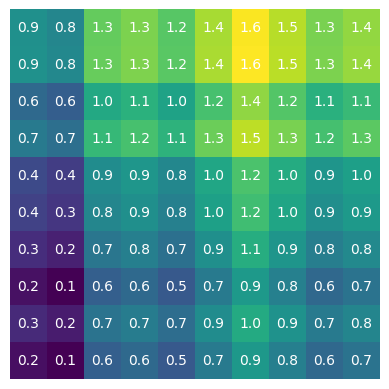

In [ ]:
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

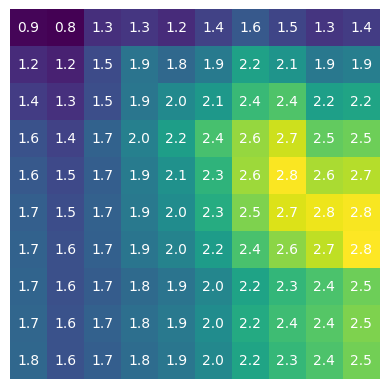

In [ ]:
acc = subsequence_cost_matrix(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

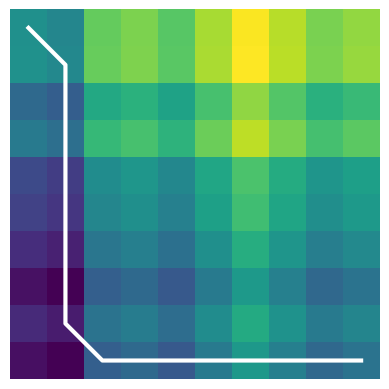

In [ ]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [ ]:
path, dist = dtw_path(ts1[:10], ts2[:10], 
                      global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

2.671847255484814

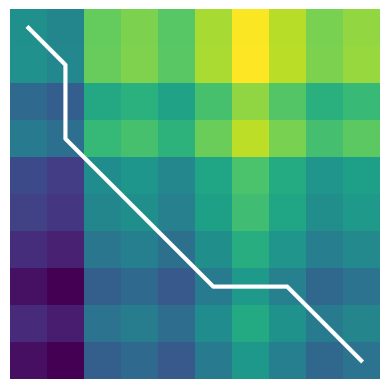

In [ ]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [ ]:
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="itakura", itakura_max_slope=2.)
dist

2.7735610409191542

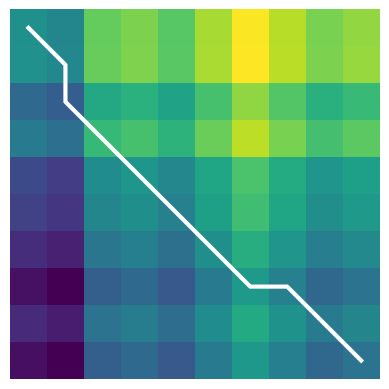

In [ ]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [ ]:
cdist_dtw([ts1, ts2, ts])

array([[   0.        ,    8.17451623, 3732.77326533],
       [   8.17451623,    0.        , 3722.00963714],
       [3732.77326533, 3722.00963714,    0.        ]])

### DTW2 

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.6 MB/s eta 0:00:00


In [ ]:
from pyts.metrics import dtw as dtw2

In [ ]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel())

2.534743944938014

In [ ]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='absolute')

8.961049312476256

In [ ]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='square', method='fast')

2.8753225105990756

In [ ]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='absolute', method='fast')

8.961049312476256

# Features Extraction

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
features = calculate_features(ts)

In [ ]:
features

{'avg': 280.2986111111111,
 'std': 119.54904153277147,
 'var': 14291.973331404319,
 'med': 265.5,
 '10p': 135.3,
 '25p': 180.0,
 '50p': 265.5,
 '75p': 360.5,
 '90p': 453.20000000000044,
 'iqr': 180.5,
 'cov': 2.3446328595974064,
 'skw': 0.577068234901525,
 'kur': -0.39377217091281036}

In [ ]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 13.8 MB/s eta 0:00:00


In [ ]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

https://tsfresh.readthedocs.io/en/latest/index.html

In [ ]:
df['id'] = [0] * len(df)

In [ ]:
settings = ComprehensiveFCParameters()
del settings['matrix_profile']

KeyError: ignored

In [ ]:
features = extract_features(timeseries_container=df, 
                            column_id='id', 
                            default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


In [ ]:
features.to_dict()

{'#Passengers__variance_larger_than_standard_deviation': {0: 1.0},
 '#Passengers__has_duplicate_max': {0: 0.0},
 '#Passengers__has_duplicate_min': {0: 0.0},
 '#Passengers__has_duplicate': {0: 1.0},
 '#Passengers__sum_values': {0: 40363.0},
 '#Passengers__abs_energy': {0: 13371737.0},
 '#Passengers__mean_abs_change': {0: 25.86013986013986},
 '#Passengers__mean_change': {0: 2.237762237762238},
 '#Passengers__mean_second_derivative_central': {0: 0.1267605633802817},
 '#Passengers__median': {0: 265.5},
 '#Passengers__mean': {0: 280.2986111111111},
 '#Passengers__length': {0: 144.0},
 '#Passengers__standard_deviation': {0: 119.54904153277147},
 '#Passengers__variation_coefficient': {0: 0.4265060074999156},
 '#Passengers__variance': {0: 14291.973331404319},
 '#Passengers__skewness': {0: 0.5831604861560892},
 '#Passengers__kurtosis': {0: -0.3649418621454963},
 '#Passengers__root_mean_square': {0: 304.72821451618523},
 '#Passengers__absolute_sum_of_changes': {0: 3698.0},
 '#Passengers__longest

# Compression-based Distances

In [ ]:
import zlib
import string

In [ ]:
s = "Hello world!"
print(s)
print(s.encode('utf-8'))
zlib.compress(s.encode('utf-8'))

Hello world!
b'Hello world!'


b'x\x9c\xf3H\xcd\xc9\xc9W(\xcf/\xcaIQ\x04\x00\x1d\t\x04^'

In [ ]:
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [ ]:
ts1_str = (' '.join([str(v) for v in ts1[:10]])).encode('utf-8')
ts1_str

b'0.31031046410567514 0.5493964388508005 0.37033490811262243 0.6478154954630186 0.3982269671901556 0.5882903523477848 0.6747907040426273 0.7944366506649685 0.49563207029057565 0.5599507955070402'

In [ ]:
ts2_str = (' '.join([str(v) for v in ts2[:10]])).encode('utf-8')
ts2_str

b'1.0654513267982786 1.1681054264949056 1.126901469788376 1.1893030288691548 1.5284187485425784 1.5144676949732443 1.5065724908147904 1.5179674461468875 1.8305928387599673 1.9315445432768577'

In [ ]:
print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  380
len(compress(ts1_str+ts2_str)):  202
len(compress(ts1_str)):  112
len(compress(ts2_str)):  110
CDM =  0.9099099099099099


In [ ]:
ts1_str = (' '.join([str(v) for v in ts1])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  7687
len(compress(ts1_str+ts2_str)):  3803
len(compress(ts1_str)):  1920
len(compress(ts2_str)):  1890
CDM =  0.9981627296587926


# Time Series Approximation

In [ ]:
from pyts.approximation import DiscreteFourierTransform

In [ ]:
n_coefs = 32

dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts_dft = dft.fit_transform(ts.values.reshape(1, -1))

In [ ]:
ts.values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [ ]:
ts_dft

array([[40363.        ,   855.03234509,  8906.55957752,   -48.11511547,
         4098.69668909,   517.59389868,  3225.75142471,  -137.07676224,
         2323.01116615,  -213.4231888 ,  2009.36100487,   -93.89149881,
         1291.59342203,  -134.81798293,  1255.57847375,  -135.03867759,
         1379.3293578 ,  -240.18002361,  1088.68680451,  -171.13369349,
         1235.28579471,  -238.67336433,  1823.9330938 , -3466.75657893,
          321.35194229,  -426.82011213,  -390.16276122,  -243.20540917,
           51.02982996,  -159.56749502,   221.64568559,  -185.77305045]])

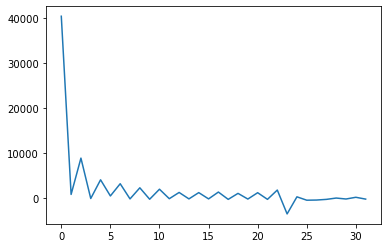

In [ ]:
plt.plot(ts_dft.ravel())
plt.show()

In [ ]:
ts_dft.shape

(1, 32)

In [ ]:
# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [ ]:
ts_dft_inv = dft_inverse_trasform(ts_dft, n_coefs=n_coefs, n_timestamps=len(ts.values))
ts_dft_inv

array([[217.49518459, 157.04916925, 121.73754826, 109.99673293,
        115.18438264, 128.13513239, 140.12435375, 145.30130653,
        141.90427727, 132.02596278, 120.18804268, 111.34038183,
        109.01413439, 114.21541671, 125.3245381 , 138.89665227,
        150.97570533, 158.42027533, 159.81095909, 155.71110501,
        148.29517667, 140.55282046, 135.36675556, 134.74159505,
        139.36180114, 148.53210912, 160.44914957, 172.69278516,
        182.8091062 , 188.86764688, 189.89522841, 186.10935954,
        178.89857896, 170.53430343, 163.65282819, 160.60917608,
        162.85645417, 170.5211356 , 182.31022238, 195.80259002,
        208.06635966, 216.44259049, 219.27836441, 216.40050114,
        209.19301653, 200.25354518, 192.72049335, 189.4490557 ,
        192.24860163, 201.37248917, 215.38596533, 231.44868124,
        245.956072  , 255.40455141, 257.29043618, 250.83051089,
        237.31106942, 219.93736852, 203.1639866 , 191.62202339,
        188.88916071, 196.43127441, 213.

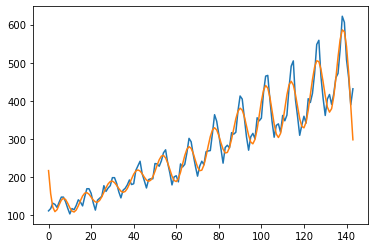

In [ ]:
plt.plot(ts.ravel())
plt.plot(ts_dft_inv.ravel())
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD, randomized_svd

In [ ]:
svd = TruncatedSVD(n_components=2)
ts_svd = svd.fit_transform(ts.values.reshape(1, -1))
#ts_svd = svd.fit_transform(np.array([ts.values.reshape(1, -1)[0], 
#                                     ts.values.reshape(1, -1)[0]]))

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_truncated_svd.py:234: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


In [ ]:
ts_svd

array([[3656.73857419]])

In [ ]:
ts_svd_inv = svd.inverse_transform(ts_svd)[0]
ts_svd_inv

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

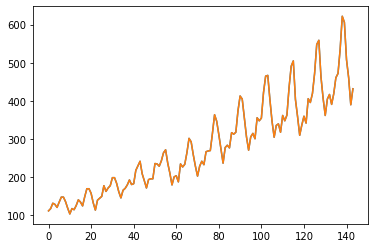

In [ ]:
plt.plot(ts.ravel())
plt.plot(ts_svd_inv.ravel())
plt.show()

In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.values.reshape(1,-1))

In [ ]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

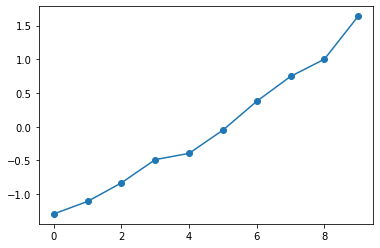

In [ ]:
plt.plot(ts_paa.ravel(), marker='o')
plt.show()

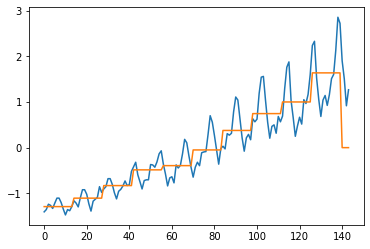

In [ ]:
plt.plot(ts.ravel())
plt.plot(paa_dataset_inv.ravel())
plt.show()

In [ ]:
ts_paa

array([[[-1.29246454],
        [-1.10724468],
        [-0.83180481],
        [-0.48705687],
        [-0.39444694],
        [-0.05029649],
        [ 0.37690417],
        [ 0.74614893],
        [ 1.00127435],
        [ 1.63878917]]])

In [ ]:
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, 
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

In [ ]:
ts_sax

array([[[0],
        [1],
        [1],
        [2],
        [2],
        [3],
        [5],
        [6],
        [6],
        [7]]])

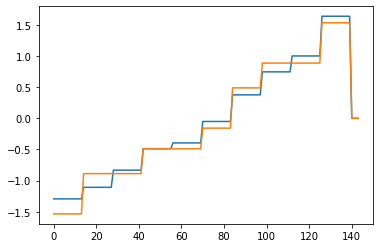

In [ ]:
#plt.plot(ts.ravel())
plt.plot(paa_dataset_inv.ravel())
plt.plot(sax_dataset_inv.ravel())
plt.show()

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.values.reshape(1,-1))
ts1 = scaler.fit_transform(ts1.values.reshape(1,-1))
ts2 = scaler.fit_transform(ts2.values.reshape(1,-1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

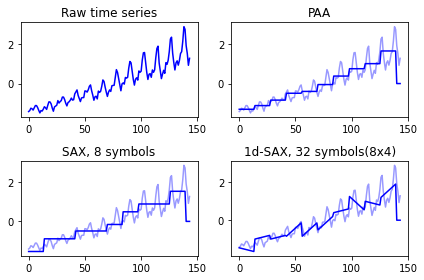

In [ ]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, 
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

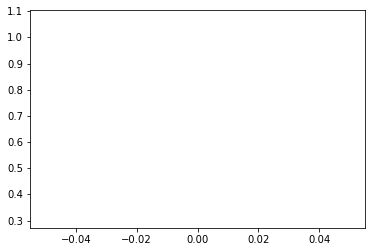

In [ ]:
plt.plot(ts1[0].ravel())
plt.plot(ts2[0].ravel())
plt.show()

In [ ]:
ts1_paa = paa.fit_transform(ts1.values.reshape(1,-1))
ts2_paa = paa.fit_transform(ts2.values.reshape(1,-1))

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


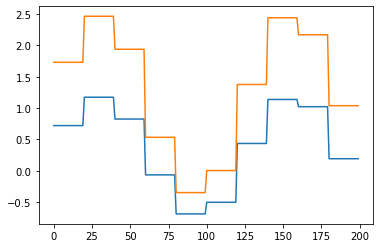

In [ ]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())
plt.plot(paa.inverse_transform(ts2_paa)[0].ravel())
plt.show()

In [ ]:
ts1_str = (' '.join([str(v) for v in ts1_paa[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_paa[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  384
len(compress(ts1_str+ts2_str)):  209
len(compress(ts1_str)):  116
len(compress(ts2_str)):  116
CDM =  0.9008620689655172


In [ ]:
ts1_sax = sax.fit_transform(ts1.values.reshape(1,-1))
ts2_sax = sax.fit_transform(ts2.values.reshape(1,-1))

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


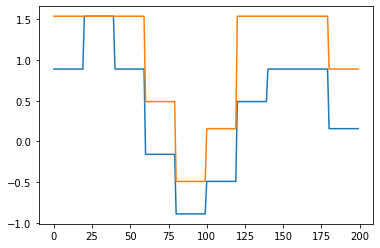

In [ ]:
plt.plot(sax.inverse_transform(ts1_sax)[0].ravel())
plt.plot(sax.inverse_transform(ts2_sax)[0].ravel())
plt.show()

In [ ]:
ts1_str = (' '.join([str(v) for v in ts1_sax[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  38
len(compress(ts1_str+ts2_str)):  37
len(compress(ts1_str)):  25
len(compress(ts2_str)):  22
CDM =  0.7872340425531915


In [ ]:
ts1_sax1d = one_d_sax.fit_transform(ts1.values.reshape(1,-1))
ts2_sax1d = one_d_sax.fit_transform(ts2.values.reshape(1,-1))

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


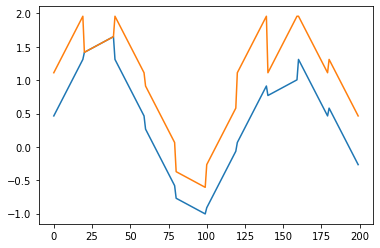

In [ ]:
plt.plot(one_d_sax.inverse_transform(ts1_sax1d)[0].ravel())
plt.plot(one_d_sax.inverse_transform(ts2_sax1d)[0].ravel())
plt.show()

In [ ]:
ts1_str = (' '.join([str(v) for v in ts1_sax1d[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax1d[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  78
len(compress(ts1_str+ts2_str)):  52
len(compress(ts1_str)):  36
len(compress(ts2_str)):  34
CDM =  0.7428571428571429


# Clustering

## Shape-based Clustering

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

In [ ]:
X = random_walks(n_ts=50, sz=32, d=1)

In [ ]:
X.shape

(50, 32, 1)

In [ ]:
np.squeeze(X).shape

(50, 32)

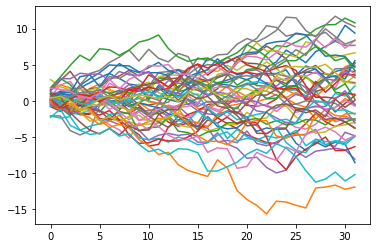

In [ ]:
plt.plot(np.squeeze(X).T)
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", 
                      max_iter=5, random_state=0)
km.fit(X)

TimeSeriesKMeans(max_iter=5, random_state=0)

In [ ]:
km.cluster_centers_.shape

(3, 32, 1)

In [ ]:
np.squeeze(km.cluster_centers_).T

array([[ 0.27155447, -0.36334153,  0.50716272],
       [ 0.28023959, -0.18460367,  0.7382992 ],
       [ 0.26989607, -0.79372761,  0.46678761],
       [-0.13260851, -0.63071881,  1.01769699],
       [-0.29208289, -1.11230112,  1.52070085],
       [-0.2416042 , -1.37249528,  2.05543191],
       [-0.24168926, -1.29638963,  2.5747254 ],
       [-0.3083012 , -1.67064219,  2.41052384],
       [-0.37256278, -2.16036766,  2.51304001],
       [-0.06109013, -2.83500068,  2.43987446],
       [-0.26008089, -3.27754991,  2.63650005],
       [-0.06294124, -3.22620691,  2.96795215],
       [ 0.0574568 , -3.52578854,  3.03504473],
       [ 0.22584479, -4.03385302,  3.17724876],
       [ 0.85935279, -4.37356975,  2.84889077],
       [ 0.70794361, -4.63599785,  3.1717227 ],
       [ 0.60250397, -4.88602475,  3.4656167 ],
       [ 0.49094335, -4.70893143,  3.96950996],
       [ 0.687078  , -4.98614914,  4.17824964],
       [ 0.59256484, -5.3513782 ,  4.75072669],
       [ 0.5436549 , -5.1711112 ,  5.612

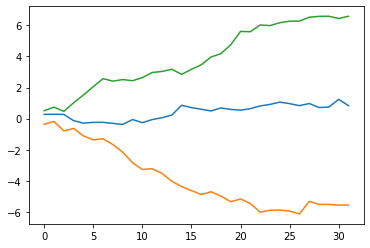

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
km.labels_

array([2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 0])

In [ ]:
km.inertia_

184.76436689630177

In [ ]:
from sklearn.cluster import KMeans

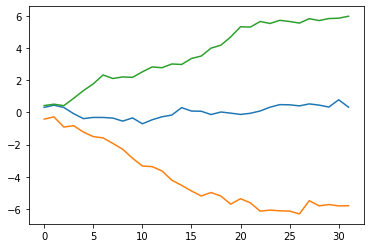

In [ ]:
km_skl = KMeans(n_clusters=3, max_iter=5, random_state=0)
km_skl.fit(np.squeeze(X))

plt.plot(np.squeeze(km_skl.cluster_centers_).T)
plt.show()

In [ ]:
km_skl.cluster_centers_.shape

(3, 32)

In [ ]:
np.squeeze(X).shape

(50, 32)

In [ ]:
from sklearn.datasets import load_iris

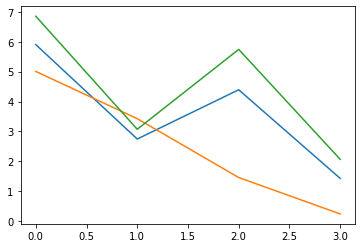

In [ ]:
X_iris, _ = load_iris(return_X_y=True)

km_skl = KMeans(n_clusters=3, max_iter=5, random_state=0)
km_skl.fit(X_iris)

plt.plot(np.squeeze(km_skl.cluster_centers_).T)
plt.show()

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", 
                          max_iter=5, random_state=0)
km_dtw.fit(X)

TimeSeriesKMeans(max_iter=5, metric='dtw', random_state=0)

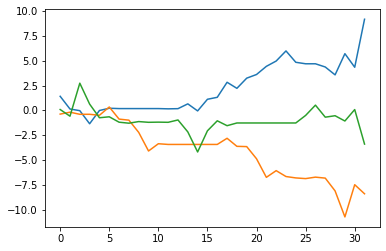

In [ ]:
plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
plt.show()

In [ ]:
km_dtw.labels_

array([2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0])

In [ ]:
km_dtw.inertia_

55.1800601618853

## Features-based Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
F = [list(calculate_features(x).values())[:-2] for x in X]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(F)

KMeans(n_clusters=3)

In [ ]:
kmeans.inertia_

2068.004571660702

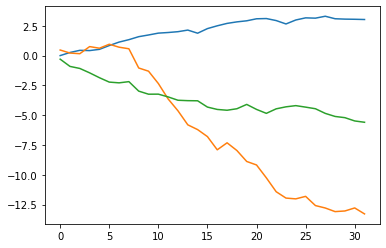

In [ ]:
for i in range(3):
    plt.plot(np.mean(X[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

# Compression-based Clustering

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [ ]:
M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), 
                       metric=cdm_dist)

In [ ]:
M.shape

(50, 50)

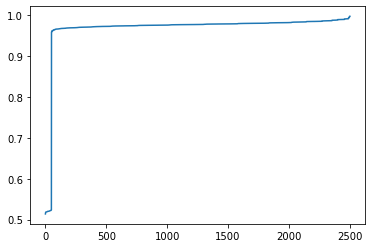

In [ ]:
plt.plot(sorted(M.ravel()))
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.965, min_samples=5, metric='precomputed')
dbscan.fit(M)

DBSCAN(eps=0.965, metric='precomputed')

In [ ]:
dbscan.labels_

array([ 1, -1, -1, -1, -1, -1, -1,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1,  0,  1,  0,  0,  1, -1,  1,  0, -1])

# Approximated Clustering

In [ ]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)

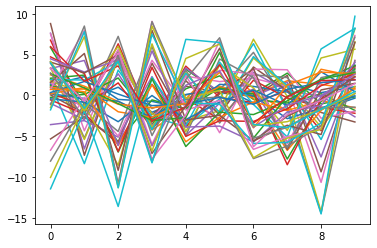

In [ ]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(max_iter=5, random_state=0)

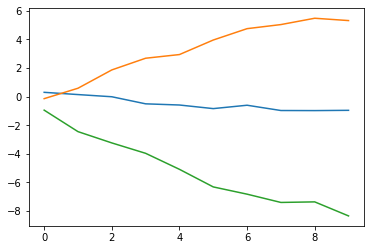

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
km.labels_

array([1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 0])

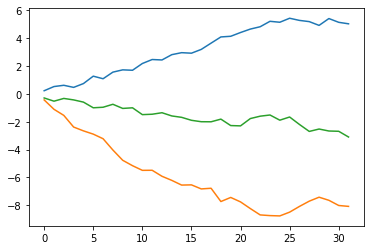

In [ ]:
for i in range(3):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.show()